## Bioinformatics Algorithms intro

In [1]:
ori = 'atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc'
vibro_cholarae = "ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC"
# Then, print the length of ori
print(len(ori))

548


In [2]:
def pattern_count(text: str, pattern: str) -> int:
    count = 0
    p_len = len(pattern)
    for i in range(len(text) - p_len + 1):
        if pattern == text[i:i + p_len]:
            count += 1
    return count

print(pattern_count(vibro_cholarae, "TGATCA"))


8


In [3]:
# most frequent k-mer in string
def FrequencyMap(Text, k):
    freq = {}
    for i in range(len(Text) - k + 1):
        pattern = Text[i:i + k]
        freq[pattern] = freq.get(pattern, 0) + 1
    return freq




In [4]:
def FrequentWords(Text, k):
    freq_map  = FrequencyMap(Text, k)
    max_sub = max(freq_map.values())
    return [key for key in freq_map if freq_map[key] == max_sub]

freq_words = FrequentWords(vibro_cholarae, 10)
print(freq_words)

['CTCTTGATCA', 'TCTTGATCAT']


In [5]:
def compliment(text: str) -> str:
    compliments = {"A": "T", "T": "A", "C": "G", "G": "C"}
    reverse = text[::-1]
    compliment_chars = [compliments[s] for s in reverse]
    return "".join(compliment_chars) 

print(compliment("ATGATCAAG"))

CTTGATCAT


In [6]:
def pattern_match(pattern, genome):
    output = []
    for i in range(len(genome) - len(pattern) + 1):
        sub = genome[i: i + len(pattern)]
        if pattern == sub:
            output.append(i)
    return output

print(pattern_match("CTTGATCAT", "GATATATGCATATACTT"))

[]


In [7]:
# loops through sets of L first (chunk it), find all string in that sub string tha
# occurs t times and is k length long
def find_patterns(sequence, k, t) -> set:
    freq = {}
    for i in range(len(sequence) - k + 1):
        pattern = sequence[i: i + k]
        freq[pattern] = freq.get(pattern, 0) + 1 
    return {pattern for pattern, count in freq.items() if count == t}

def find_distinct_kmers_from_clump(genome: str, k: int, L: int, t: int):
    distinct = set()
    loops = (len(genome) // L) + (len(genome) - L)
    for i in range(loops + 1):
        patterns = find_patterns(genome[i:i+L], k, t)
        distinct.update(patterns)
    return distinct

genome = "gatcagcataagggtccCTGCAATGCATGACAAGCCTGCAGTtgttttac"
print(find_distinct_kmers_from_clump(vibro_cholarae, k = 9, L = 500,t = 3))

{'TCTTGATCA', 'CTTGATCAT', 'ATGATCAAG', 'CTCTTGATC'}


In [8]:
def symbol_array(genome: str, symbol: str) -> dict[str]:
    window_l = len(genome) // 2
    extended_genome = genome + genome[0:window_l]
    symbol_array = {}
    for i in range(len(genome)):
        sub = extended_genome[i:i + window_l]
        symbol_array[i] = pattern_count(sub, symbol) # can also user sub.count(symbol)
    return symbol_array

print(symbol_array("AAAAGGGG", "A"))

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}


In [9]:
# window sliding technique
def faster_symbol_array(genome: str, symbol: str) -> dict[str]:
    n = len(genome)
    window_l = n // 2
    extended_genome = genome + genome[0:window_l]
    symbol_array = {}
    # look at the first half of Genome to compute first array value
    symbol_array[0] = pattern_count(genome[0:window_l] , symbol)
    
    for i in range(1, n):
        symbol_array[i] = symbol_array[i-1]
        # the current array value can differ from the previous array value by at most 1
        if extended_genome[i-1] == symbol:
            symbol_array[i] = symbol_array[i] - 1
        if extended_genome[i + window_l - 1] == symbol:
            symbol_array[i] = symbol_array[i] + 1
    return symbol_array

start = faster_symbol_array("AAAAGGGG", "A")
max(start, key= start.get)

0

In [10]:
# way faster and actually runs
# min is start of forward half strand and max is start of reverse half strand
with open('e.coli.txt', 'r') as file:
    e_coli_string = file.read()
    start = faster_symbol_array(e_coli_string, "C")
    print(max(start, key= start.get))  
    print(min(start, key= start.get))  

1651311
3971149


In [11]:
def skew_array(genome):
    array = [0]
    for i in range(len(genome)):
        if genome[i] == "A" or genome[i] == "T":
            array.append(array[i])
        elif genome[i] == "C":
            array.append(array[i] - 1)
        else:
            array.append(array[i] + 1)
    return array

" ".join(map(str, skew_array("GAGCCACCGCGATA")))  


'0 1 1 2 1 0 0 -1 -2 -1 -2 -1 -1 -1 -1'

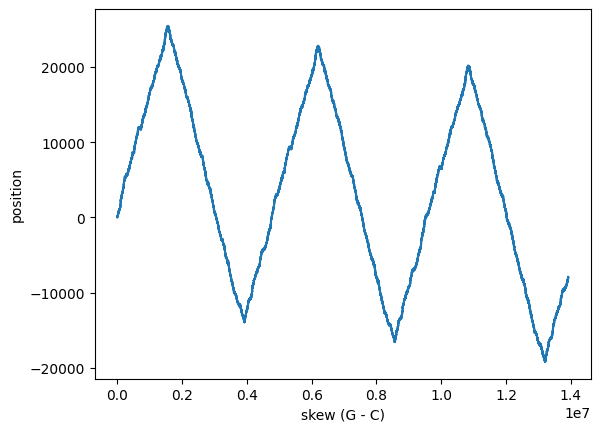

In [12]:
import matplotlib.pyplot as plt;
with open('e.coli.txt', 'r') as file:
    e_coli_string = file.read()
    skw_arr = skew_array(e_coli_string)
    plt.plot(skw_arr)
    plt.xlabel("skew (G - C)")
    plt.ylabel("position")

In [13]:
def minimize_skew(genome):
    skw_arr = skew_array(genome)
    min_val = min(skw_arr)
    return [idx for idx,val in enumerate(skw_arr) if val == min_val]

minimize_skew("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT")

[11, 24]

In [14]:
# assume same len p,q
def hamming_distance(p:str, q:str) -> int:
    dist = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            dist += 1
    return dist

hamming_distance("GGGCCGTTGGT", "GGACCGTTGAC")

3

In [15]:
def find_approx_patternMatching(text:str, pattern:str, d: int) -> list[int]:
    output = []
    for i in range(len(text) - len(pattern) + 1):
        sub = text[i: i + len(pattern)]
        if hamming_distance(pattern, sub) <= d:
            output.append(i)
    return output

find_approx_patternMatching("CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT","ATTCTGGA", 3)

[6, 7, 26, 27]

In [16]:
def find_approx_pattern_count(text: str, pattern: str, d) -> int:
    idxs = find_approx_patternMatching(text, pattern,d )
    return len(idxs)

find_approx_pattern_count("TTTAGAGCCTTCAGAGG", "GAGG", 2)

4

In [17]:
# 1.7 entropy calc- usually better than just score for motifs!!!
import numpy as np
def calculate_entropy(probs):
    return -sum(prob * np.log2(prob) for prob in probs if prob > 0)

# Example usage
probs = [0.2, 0.1, 0.7, 0.2, 0.6, 0.2, 1, 1, 0.9, 0.1, 0.9, 0.1, 0.9, 0.1, 0.1, 0.4, 0.5, 0.1, 0.1, 0.8, 0.1, 0.2, 0.7, 0.3, 0.4, 0.3, 0.6, 0.4]
entropy = calculate_entropy(probs)
print(entropy)

9.916290005356972


In [18]:
def count_motifs(motifs):
    len_str = len(motifs[0])
    count_motifs = {nucleotide: [0]*len_str for nucleotide in "ACGT"}
    # each motif, each char add count to that index!
    for motif in motifs:
        for i,char in enumerate(motif):
            count_motifs[char][i] += 1
    return count_motifs

motifs = ["AACGTA","CCCGTT","CACCTT", "GGATTA", "TTCCGG"]
count_motifs(motifs)

{'A': [1, 2, 1, 0, 0, 2],
 'C': [2, 1, 4, 2, 0, 0],
 'G': [1, 1, 0, 2, 1, 1],
 'T': [1, 1, 0, 1, 4, 2]}

In [19]:
def profile_motifs(motifs: list[str]) -> dict[str, list[int]]:
    n_rows = len(motifs)
    counts_dict = count_motifs(motifs)
    profile = {}
    for char, counts in counts_dict.items():
        profile[char] = [count/n_rows for count in counts]   
    return profile;

print(profile_motifs(motifs))

{'A': [0.2, 0.4, 0.2, 0.0, 0.0, 0.4], 'C': [0.4, 0.2, 0.8, 0.4, 0.0, 0.0], 'G': [0.2, 0.2, 0.0, 0.4, 0.2, 0.2], 'T': [0.2, 0.2, 0.0, 0.2, 0.8, 0.4]}


In [20]:
# max count of samples (makes more sense honestly)
def consensus_motif(motifs): 
    counts_dict = count_motifs(motifs)
    consensus = ""
    for i in range(len(motifs[0])):
        col = {row: counts_dict[row][i] for row in counts_dict}
        consensus += max(col, key=col.get)
    return consensus
        
print(consensus_motif(motifs))    

CACCTA


In [21]:
def score_motif(motifs):
    score = 0
    consensus = consensus_motif(motifs)
    for i in range(len(consensus)):
        col = [motif[i] for motif in motifs]
        score += sum(1 for char in col if char != consensus[i])
    return score

def score_alternate(motifs):
    score = 0
    consensus = consensus_motif(motifs)
    for i in range(len(motifs)):
        for j in range(len(motifs[0])):
            if motifs[i][j] != consensus[j]:
                score += 1
    return score

score_alternate(motifs)

14

In [22]:
def entropy_motifs(motifs):
    probs = np.ravel(list(profile_motifs(motifs).values()))
    return calculate_entropy(probs)
print(entropy_motifs(motifs))
    

8.331568569324173


In [23]:
def pr(text: str, profile: dict[str, list[str]]):
    prob = 1
    for i in range(len(text)):
        prob *= profile[text[i]][i]
    return prob

pr("CAGTGA", {
    "A": [0.4 , 0.3,  0.0,  0.1,  0.0,  0.9],
    "C": [0.2 , 0.3,  0.0,  0.4,  0.0,  0.1],
    "G": [0.1 , 0.3,  1.0,  0.1,  0.5,  0.0],
    "T": [0.3 , 0.1,  0.0,  0.4,  0.5,  0.0]
})
        

0.0108

In [24]:
def profile_most_probable_kmer(text, k, profile):
    most_prob, prob = "", -1
    for i in range(len(text) - k + 1):
        kmer = text[i: i + k]
        kmer_prob = pr(kmer, profile)
        if kmer_prob > prob:
            most_prob,prob = kmer, kmer_prob
    return most_prob



In [25]:
# greedy algos want the best solution at current time (locally!) at each step
# Input:  A list of kmers Dna, and integers k and t (where t is the number of kmers in Dna)
# Output: GreedyMotifSearch(Dna, k, t)
# find the motif for each kmer of dna!!!
def greedy_motif_search(dna: list[str], k: int, t: int) -> list[str]:
    best_motifs = []
    # assign first kmer as best
    for i in range(0, t):
        best_motifs.append(dna[i][0:k])
    n = len(dna[0])
    for i in range(n - k + 1):
        motifs = []
        motifs.append(dna[0][i:i + k])
        for j in range(1, t):
            p = profile_motifs(motifs[0:j])
            motifs.append(profile_most_probable_kmer(dna[j], k, p))
        if score_motif(motifs) < score_motif(best_motifs):
            best_motifs = motifs
    return best_motifs

dna = ["GGCGTTCAGGCA","AAGAATCAGTCA", "CAAGGAGTTCGC","CACGTCAATCAC", "CAATAATATTCG"]
greedy_motif_search(dna, 3, 5)

['CAG', 'CAG', 'CAA', 'CAA', 'CAA']

In [26]:
def count_with_pseudocounts(motifs):
    len_str = len(motifs[0])
    count_motifs = {nucleotide: [1]*len_str for nucleotide in "ACGT"}
    # each motif, each char add count to that index!
    for motif in motifs:
        for i,char in enumerate(motif):
            count_motifs[char][i] += 1
    return count_motifs

In [27]:
def profile_with_pseudocounts(motifs):
    n_rows = len(motifs)
    counts_dict = count_with_pseudocounts(motifs)
    profile = {}
    for char, counts in counts_dict.items():
        # each count divide by column counts
        profile[char] = [count/(n_rows + 4) for count in counts]   
    return profile;

In [28]:
def motifs(profile, dna):
    k = len(profile["A"])
    most_prob_kmers = []
    for string in dna:
        most_prob_kmers.append(profile_most_probable_kmer(string, k, profile))
    return most_prob_kmers
        

In [29]:
import random

def random_motifs(dna, k, t):
    random_motifs = []
    M = len(dna[0]) - k
    for i in range(t):
        rand_start = random.randint(0, M)
        random_motifs.append(dna[i][rand_start: rand_start + k])
    return random_motifs

random_motifs([
    "TTACCTTAAC",
    "GATGTCTGTC",
    "ACGGCGTTAG",
    "CCCTAACGAG",
    "CGTCAGAGGT",
], 3, 5)

['CCT', 'GTC', 'GGC', 'CTA', 'TCA']

In [30]:
def random_motif_search(dna, k, t):
    best_motifs = random_motifs(dna, k, t)
    while True:
        profile = profile_with_pseudocounts(best_motifs)
        new_motifs = motifs(profile, dna)
        if score_motif(new_motifs) < score_motif(best_motifs):
            best_motifs = new_motifs
        else:
            return best_motifs
random_motif_search([
    "CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA",
    "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
    "TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
    "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
    "AATCCACCAGCTCCACGTGCAATGTTGGCCTA",
], 8, 5)

['GTAAACGG', 'TGTAAGTG', 'CGAAAGAA', 'TAGATCAA', 'TGCAATGT']

In [31]:
def normalize(probabilities):
    denominator = sum(probabilities.values())
    return {base: prob/denominator for base, prob in probabilities.items()}

normalize({'A': 0.1, 'C': 0.1, 'G': 0.1, 'T': 0.1})

{'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}

In [45]:
def weighted_die(probabilities: dict[str, float]) -> str:
    p = random.uniform(0, 1)
    cumlative_prob = 0
    for kmer, prob in probabilities.items():
        cumlative_prob += prob
        if p < cumlative_prob:
            return kmer


In [33]:
def profile_generating_string(text, profile, k):
    n = len(text)
    probabilites = {}
    for i in range(n - k + 1):
        probabilites[text[i:i+k]] = pr(text[i:i+k], profile)
    return weighted_die(normalize(probabilites))


profile_generating_string("AAACCCAAACCC", {'A': [0.5, 0.1], 'C': [0.3, 0.2], 'G': [0.2, 0.4], 'T': [0.0, 0.3]}, 2)

'CC'

In [46]:
def gibbs_sampler(dna, k,  t, N):
    best_motifs = random_motifs(dna, k, t)
    for _ in range(N):
        remove_idx = random.randint(0, t-1)
        cur_motifs = [motif for idx, motif in enumerate(best_motifs) if idx != remove_idx]
        profile = profile_with_pseudocounts(cur_motifs)
        motif_cur = profile_generating_string(dna[remove_idx], profile, k)
        cur_motifs.insert(remove_idx, motif_cur)
        if score_motif(cur_motifs) < score_motif(cur_motifs):
            best_motifs = cur_motifs
    return best_motifs

gibbs_sampler(
["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA",
"GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
"TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
"TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
"AATCCACCAGCTCCACGTGCAATGTTGGCCTA"],
8, 5, 100
)
        

['CGGGGGTG', 'AAGTGCCA', 'CGAAAGAA', 'AGGTGCAC', 'GTGCAATG']

In [ ]:
# tubercolosis hibernate hide from antibiotics
